In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# we load both training and testing splits as our final project mainly focuses on the unsupervised setting. 
raw_dataset = fetch_20newsgroups(subset='all', shuffle=False)
print(raw_dataset.data[0])

From: cubbie@garnet.berkeley.edu (                               )
Subject: Re: Cubs behind Marlins? How?
Article-I.D.: agate.1pt592$f9a
Organization: University of California, Berkeley
Lines: 12
NNTP-Posting-Host: garnet.berkeley.edu


gajarsky@pilot.njin.net writes:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.



In [3]:
# Sklearn already implements an interface for this step.
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


In [4]:
corpus = dataset.data # save as the raw docs
labels = dataset.target # labels for clustering evaluation or supervised tasks
print(len(corpus), len(labels))
print(labels)
print(dataset.target_names)

18846 18846
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
# Let's show the first 10 documents
for i in range(10):
    doc = corpus[i]
    category = dataset.target_names[labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

In [6]:
#finding frequency of each category 
targets, frequency = np.unique(dataset.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984,
        990, 987, 997, 910, 940, 775, 628], dtype=int64))

In [7]:
targets_str = np.array(dataset.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 799), ('comp.graphics', 973), ('comp.os.ms-windows.misc', 985), ('comp.sys.ibm.pc.hardware', 982), ('comp.sys.mac.hardware', 963), ('comp.windows.x', 988), ('misc.forsale', 975), ('rec.autos', 990), ('rec.motorcycles', 996), ('rec.sport.baseball', 994), ('rec.sport.hockey', 999), ('sci.crypt', 991), ('sci.electronics', 984), ('sci.med', 990), ('sci.space', 987), ('soc.religion.christian', 997), ('talk.politics.guns', 910), ('talk.politics.mideast', 940), ('talk.politics.misc', 775), ('talk.religion.misc', 628)]


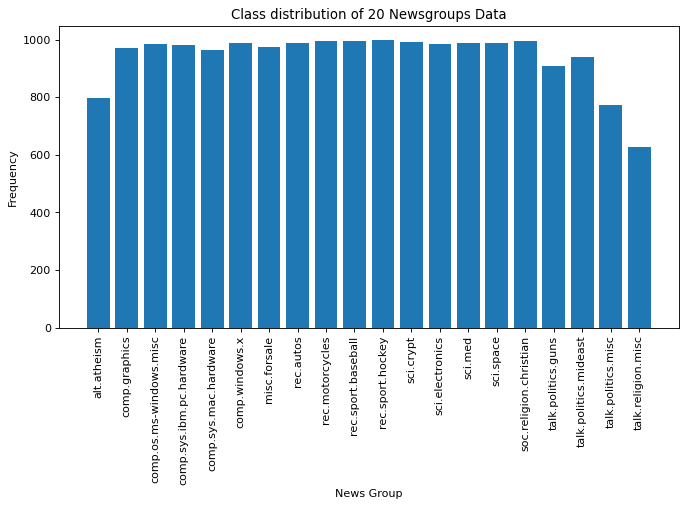

<Figure size 432x288 with 0 Axes>

In [8]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Class_distribution.png')

In [9]:
import pandas as pd
dataset_df = pd.DataFrame({'data': dataset.data, 'target': dataset.target})
dataset_df.head()

,data,target
0,\nmorgan and guzman will have era's 1 run high...,9
1,"Well, I just got my Centris 610 yesterday. It...",4
2,Archive-name: cryptography-faq/part10\nLast-mo...,11
3,To the best of my knowledge there aren't any p...,4
4,\n\nI think that domestication will change beh...,0


In [10]:
# So, appraently, we need do more Pre-processing step
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwords_extended = stopwords.words('english')
stopwords_extended.extend(['from', 'subject', 're', 'edu', 'use', 'know', 'make','also','say','take','come','want','look','even','find','thing','problem','need'
                 ,'first','much','many','light','call','last'])
stopwords_extended=set(stopwords_extended)
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    en_stop.extend(['from', 'subject', 're', 'edu', 'use', 'know', 'make','also','say','take','come','want','look','even','find','thing','problem','need'
                 ,'first','much','many','light','call'])
    for doc in docs:
        raw_text = doc.lower()
        raw_text_stop = " ".join([i for i in raw_text.split() if i not in stopwords_extended])
        #punctuations
        raw_text_punc = raw_text_stop.translate(str.maketrans('', '', string.punctuation))
        #removing digits 
        raw_text = re.sub(r'\d+', '', raw_text_punc)
        #lemmatization
        #raw_text_lemma = " ".join(lemmatize.lemmatize(i) for i in raw_text.split())
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digits and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric() and not token.isalnum()]
        doc = [token for token in stopped_tokens_text if len(token) > 3]
        # you could always add some new preprocessing here
        yield doc

doc1 = remove_stopwords(corpus[0])
doc2 = preprocess_string(corpus[0])
doc3 = next(pre_processing([corpus[0]]))
print(dataset.data[0])
print(doc1)
print("=========================")
print(doc2)
print(doc3)


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
morgan guzman era's 1 run higher year, cubs idiots pitch harkey hibbard. castillo won't good (i think he's stud pitcher)
['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']
['morgan', 'guzman', 'eras', 'higher', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snehu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Let's first get a new corpus by using one tokenization method above
# Also, for illustration purpose, we only take the first 1000 docs from the original corpus
corpus1 = list(pre_processing(corpus[:]))
print(len(corpus1))
print(corpus1[0])
# Then we build the vocab
freqs = defaultdict(int)
for doc in corpus1:
    for w in doc:
        freqs[w] += 1
print(len(freqs))
vocab = [w for w in freqs if freqs[w]>1]
print(len(vocab))

18846
['morgan', 'guzman', 'eras', 'higher', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
116403
47823


In [12]:
import gensim
# Build the bigram and trigram models
bigram = gensim.models.Phrases(corpus1, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus1], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

2022-03-12 23:19:05,256 : INFO : collecting all words and their counts
2022-03-12 23:19:05,258 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-03-12 23:19:06,383 : INFO : PROGRESS: at sentence #10000, processed 805057 words and 697919 word types
2022-03-12 23:19:07,392 : INFO : collected 1166686 token types (unigram + bigrams) from a corpus of 1484265 words and 18846 sentences
2022-03-12 23:19:07,393 : INFO : merged Phrases<1166686 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-03-12 23:19:07,394 : INFO : Phrases lifecycle event {'msg': 'built Phrases<1166686 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 2.14s', 'datetime': '2022-03-12T23:19:07.394780', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-03-12 23:19:07,396 : INFO : collecting all words and their counts
2022-03-12 23:19:07,397 : INFO : PROGRESS: at

In [13]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
import spacy
# Form Bigrams
data_words_bigrams = make_bigrams(corpus1)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [15]:
#alternate data for experimentation purpose 
data_words_trigrams = make_trigrams(corpus1)
data_lemmatized_alt = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

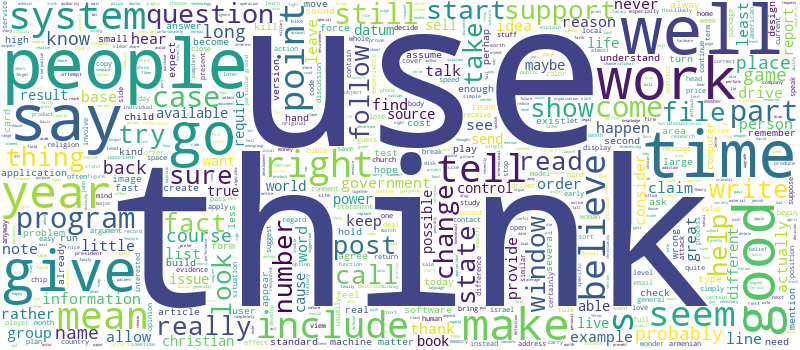

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed documnets together.
corpus_for_tf = []

for each_document in data_lemmatized:
    each_file = ""
    each_file += " ".join(each_token for each_token in each_document)
    corpus_for_tf.append(each_file)
long_string = ' '.join([sent for sent in corpus_for_tf ])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=8, contour_color='steelblue',width=800, height=350)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
wordcloud.to_file('wordcloud.png')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snehu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


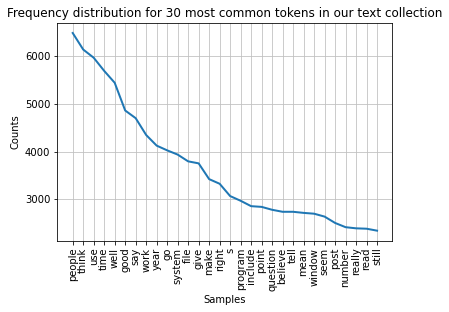

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [18]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
term_freq= FreqDist(word_tokenize(long_string))
term_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')

In [19]:
from copy import deepcopy
# A more efficient way is to use gensim.corpora
dictionary = corpora.Dictionary(data_lemmatized)
print(dictionary)


# Prune the dict by filtering with document freq (DF)
dict1 = deepcopy(dictionary)
dict1.filter_extremes(no_below=15, no_above=0.5)# no_below and no_above are related to DF
print(dict1)

dict2 = deepcopy(dictionary)
dict2.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
print(dict2)

freqs = defaultdict(int)
for doc in data_lemmatized:
    for w in doc:
        freqs[w] += 1
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=10]
remove_ids = [dictionary.token2id[w] for w in low_tf_tokens]
print(len(remove_ids))
dictionary.filter_tokens(remove_ids)
dictionary.compactify()  # remove gaps in id sequence after words that were removed
print(dictionary)

# dictionray.cfs collects all the term freqs, similar to freqs
# Let's check if the new dictionary still has token with a tf <= 3
print(len([w for w in dictionary.cfs if dictionary.cfs[w]<=5]))

2022-03-12 23:23:42,776 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-03-12 23:23:43,608 : INFO : adding document #10000 to Dictionary(70306 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...)
2022-03-12 23:23:44,457 : INFO : built Dictionary(106030 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...) from 18846 documents (total 1349696 corpus positions)
2022-03-12 23:23:44,458 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(106030 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...) from 18846 documents (total 1349696 corpus positions)", 'datetime': '2022-03-12T23:23:44.458549', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


Dictionary(106030 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...)


2022-03-12 23:23:45,012 : INFO : discarding 99169 tokens: [('castillo', 2), ('era', 5), ('guzman', 7), ('harkey', 2), ('hibbard', 3), ('stud', 9), ('afeature', 1), ('alright', 9), ('appologize', 2), ('backlogged', 1)]...
2022-03-12 23:23:45,013 : INFO : keeping 6861 tokens which were in no less than 15 and no more than 9423 (=50.0%) documents
2022-03-12 23:23:45,076 : INFO : resulting dictionary: Dictionary(6861 unique tokens: ['cub', 'good', 'high', 'idiot', 'morgan']...)


Dictionary(6861 unique tokens: ['cub', 'good', 'high', 'idiot', 'morgan']...)


2022-03-12 23:23:45,646 : INFO : discarding 104030 tokens: [('castillo', 2), ('cub', 39), ('era', 5), ('guzman', 7), ('harkey', 2), ('hibbard', 3), ('morgan', 22), ('stud', 9), ('afeature', 1), ('alright', 9)]...
2022-03-12 23:23:45,647 : INFO : keeping 2000 tokens which were in no less than 5 and no more than 9423 (=50.0%) documents
2022-03-12 23:23:45,698 : INFO : resulting dictionary: Dictionary(2000 unique tokens: ['good', 'high', 'idiot', 'pitch', 'pitcher']...)


Dictionary(2000 unique tokens: ['good', 'high', 'idiot', 'pitch', 'pitcher']...)
95414
Dictionary(10616 unique tokens: ['cub', 'good', 'high', 'idiot', 'morgan']...)
0


In [20]:
dictionary_alt = corpora.Dictionary(data_lemmatized_alt)
freqs = defaultdict(int)
for doc in data_lemmatized_alt:
    for w in doc:
        freqs[w] += 1
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=10]
remove_ids = [dictionary_alt.token2id[w] for w in low_tf_tokens]
print(len(remove_ids))
dictionary_alt.filter_tokens(remove_ids)
dictionary_alt.compactify()

2022-03-12 23:23:46,280 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2022-03-12 23:23:47,243 : INFO : adding document #10000 to Dictionary(70411 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...)
2022-03-12 23:23:48,049 : INFO : built Dictionary(106198 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...) from 18846 documents (total 1340135 corpus positions)
2022-03-12 23:23:48,049 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(106198 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...) from 18846 documents (total 1340135 corpus positions)", 'datetime': '2022-03-12T23:23:48.049347', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


95636


In [21]:
dictionary.save('dictionary.dict')
dict1.save('dict1.dict')
dict2.save('dict2.dict')
dictionary_alt.save('dictionary_alt.dict')

2022-03-12 23:23:48,541 : INFO : Dictionary lifecycle event {'fname_or_handle': 'dictionary.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-03-12T23:23:48.540352', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-03-12 23:23:48,567 : INFO : saved dictionary.dict
2022-03-12 23:23:48,569 : INFO : Dictionary lifecycle event {'fname_or_handle': 'dict1.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-03-12T23:23:48.569352', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-03-12 23:23:48,596 : INFO : saved dict1.dict
2022-03-12 23:23:48,598 : INFO : Dictionary lifecycle event {'fname_or_handle': 'dict2.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'd

In [22]:
pprint(dictionary.token2id)

{'aaron': 6490,
 'abandon': 1243,
 'abbott': 3430,
 'abbreviation': 7686,
 'abdullah': 3403,
 'abide': 5846,
 'ability': 1244,
 'able': 676,
 'abode': 4932,
 'abolish': 4171,
 'abomination': 8352,
 'abort': 3349,
 'abortion': 6104,
 'abound': 5381,
 'abovementione': 5981,
 'abraham': 6952,
 'abridge': 68,
 'abroad': 2733,
 'abruptly': 7388,
 'absence': 5997,
 'absent': 8749,
 'absolute': 3007,
 'absolute_truth': 5213,
 'absolutely': 1449,
 'absolutist': 9264,
 'absorb': 1617,
 'absorption': 9798,
 'abstinence': 7303,
 'abstract': 69,
 'abstraction': 7804,
 'absurd': 5678,
 'absurdity': 7137,
 'abundant': 9096,
 'abuse': 2323,
 'abuser': 8341,
 'abusive': 7986,
 'academia': 9205,
 'academic': 4452,
 'academy': 8565,
 'academy_science': 10442,
 'accelerate': 1618,
 'acceleration': 3035,
 'accelerator': 987,
 'accept': 1547,
 'acceptable': 2671,
 'acceptance': 7805,
 'access': 395,
 'accessbus': 10533,
 'accessible': 4484,
 'accessory': 7267,
 'accident': 3815,
 'accidental': 9072,
 'acci

 'austin': 6702,
 'australia': 1662,
 'australian': 7372,
 'austria': 8845,
 'austrian': 1254,
 'authentic': 8072,
 'authenticate': 5799,
 'authentication': 91,
 'authenticity': 6009,
 'author': 92,
 'authoritarian': 4802,
 'authoritative': 3798,
 'authority': 1255,
 'authorization': 1256,
 'authorize': 5999,
 'authorized': 942,
 'auto': 663,
 'autobahn': 4125,
 'autocad': 8868,
 'autodesk': 8112,
 'autoexecbat': 4333,
 'autograph': 7882,
 'automate': 5649,
 'automatic': 5947,
 'automatic_weapon': 3657,
 'automatically': 5676,
 'automation': 8641,
 'automobile': 3816,
 'automotive': 5100,
 'autonomous': 5699,
 'autonomy': 4803,
 'autopsy': 9915,
 'avail': 2741,
 'availability': 2312,
 'available': 93,
 'available_anonymous': 7883,
 'avenger': 9599,
 'avenue': 9304,
 'average': 1601,
 'average_fielder': 7620,
 'aviation': 9328,
 'avoid': 1663,
 'await': 1664,
 'awaken': 7392,
 'award': 6050,
 'aware': 1665,
 'awareness': 6292,
 'away': 526,
 'awesley': 9702,
 'awesome': 2390,
 'awful': 

 'christmas': 6187,
 'christopher': 6462,
 'chrome': 5627,
 'chromium': 10269,
 'chronic': 1047,
 'chronicle': 4267,
 'chrysler': 3749,
 'chuck': 4000,
 'chuckle': 6241,
 'chunk': 478,
 'church': 1463,
 'cica': 4203,
 'ciccarelli': 10092,
 'cigarette': 6315,
 'cincinnati': 7308,
 'cincinnati_red': 8024,
 'cipher': 112,
 'ciphertext': 2306,
 'circa': 5839,
 'circle': 1706,
 'circuit': 541,
 'circuitry': 2370,
 'circular': 3127,
 'circulate': 2678,
 'circulation': 9763,
 'circumcision': 5499,
 'circumference_mystery': 6338,
 'circumstance': 852,
 'circumvent': 3456,
 'cirrhosis': 10511,
 'cisc': 3300,
 'citation': 7428,
 'cite': 113,
 'citizen': 2697,
 'citizenry': 9049,
 'citizenship': 8825,
 'city': 1131,
 'city_party': 4531,
 'civic': 7975,
 'civil': 2410,
 'civil_libertie': 3918,
 'civil_right': 2588,
 'civilian': 4805,
 'civilization': 5000,
 'civilized': 6618,
 'cjpeg': 10480,
 'claim': 1013,
 'clamp': 5975,
 'clarification': 5877,
 'clarify': 3859,
 'clarity': 2281,
 'clark': 8025

 'defile': 10074,
 'definately': 3399,
 'define': 3081,
 'definekey_xtermmap': 10111,
 'definite': 1765,
 'definitely': 2596,
 'definition': 3082,
 'definitive': 2943,
 'deflect': 6799,
 'defterleri': 9689,
 'defy': 3700,
 'degan': 1141,
 'degenerate': 7132,
 'degradation': 9116,
 'degrade': 6921,
 'degree': 446,
 'deion': 7080,
 'deir_yassin': 10087,
 'deity': 4950,
 'delay': 405,
 'delegate': 9748,
 'delegation': 8826,
 'delete': 3083,
 'deleted_flame': 8585,
 'deletia': 8773,
 'deletion': 1017,
 'deliberate': 7138,
 'deliberately': 1766,
 'deliberation': 9476,
 'delicate': 6655,
 'delight': 4069,
 'deliver': 3243,
 'delivery': 3937,
 'dell': 9016,
 'delta': 7244,
 'delude': 4326,
 'delusion': 9399,
 'deluxe': 4122,
 'delve': 8558,
 'demand': 808,
 'demo': 4268,
 'democracy': 3013,
 'democrat': 4262,
 'democratic': 4263,
 'democratic_process': 5252,
 'demographic': 7433,
 'demolish': 5006,
 'demon': 7165,
 'demonstrate': 1230,
 'demonstration': 2976,
 'demonstrator': 9261,
 'demos': 

 'expel': 1837,
 'expend': 3512,
 'expenditure': 3513,
 'expense': 6612,
 'expensive': 546,
 'experience': 748,
 'experienced': 1426,
 'experiment': 171,
 'experimental': 867,
 'experimentation': 9064,
 'experimenter': 6210,
 'expert': 2435,
 'expertise': 3809,
 'expiration_date': 10132,
 'expire': 5546,
 'explain': 1148,
 'explaination': 1476,
 'explanation': 1294,
 'explicit': 1477,
 'explicitly': 1149,
 'explode': 1838,
 'exploit': 1839,
 'exploration': 8450,
 'explore': 955,
 'explorer': 7705,
 'explosion': 1095,
 'explosive': 2908,
 'expo': 9312,
 'export': 4106,
 'exportlcsmitedu': 3505,
 'expos': 5344,
 'expose': 2757,
 'expose_event': 3312,
 'exposure': 3991,
 'express': 1000,
 'expression': 1295,
 'expulsion': 5015,
 'extend': 172,
 'extended': 3443,
 'extension': 2427,
 'extensive': 3303,
 'extensively': 5547,
 'extent': 4808,
 'exterior': 6949,
 'exterminate': 6407,
 'extermination': 5358,
 'extern': 7828,
 'external': 3257,
 'external_modem': 10147,
 'externally': 8148,
 'e

 'header': 715,
 'heading': 10114,
 'headlight': 4712,
 'headline': 1881,
 'headphone': 1158,
 'headquarter': 1882,
 'headquarters': 1883,
 'heal': 1490,
 'healer': 1491,
 'healing': 1492,
 'health': 1304,
 'health_care': 2610,
 'health_insurance': 5194,
 'healthcare': 7448,
 'healthy': 3811,
 'healy': 10286,
 'heap': 6923,
 'hear': 33,
 'hearing': 1493,
 'heart': 4014,
 'heart_disease': 9833,
 'heat': 1097,
 'heat_sink': 6226,
 'heated': 7560,
 'heater': 3099,
 'heating': 9645,
 'heatsink': 10217,
 'heaven': 5324,
 'heavily': 1305,
 'heavy': 604,
 'hebrew': 4079,
 'heck': 3100,
 'hedican': 10287,
 'heed': 8403,
 'heel': 1884,
 'height': 5628,
 'heinous': 8519,
 'heir': 6381,
 'held_responsible': 4866,
 'helen': 5745,
 'helicopter': 6940,
 'helium': 1098,
 'hell': 879,
 'hellenistic': 10382,
 'hellman': 195,
 'helmet': 3957,
 'help': 456,
 'help_appreciate': 3416,
 'help_appreciated': 1037,
 'help_greatly': 6307,
 'helper': 6878,
 'helpfile': 10590,
 'helpful': 1438,
 'helpless': 5633,

 'kilogram': 2990,
 'kilometer': 4239,
 'kind': 961,
 'kinda': 4493,
 'kindly': 9192,
 'kindness': 6988,
 'king': 1322,
 'kingdom': 449,
 'kingston': 3387,
 'kinsey': 8013,
 'kirk': 4443,
 'kirlian': 8708,
 'kisio': 9727,
 'kiss': 9656,
 'kit': 6323,
 'kitchen': 6864,
 'kleck': 8521,
 'klein': 1323,
 'kleinpaste': 7910,
 'knee': 3812,
 'knesset': 7596,
 'knife': 7176,
 'knight': 6417,
 'knob': 3128,
 'knock': 758,
 'knot': 6418,
 'know': 685,
 'knowing': 3715,
 'knowingly': 6522,
 'knowledgable': 5469,
 'knowledge': 416,
 'knowledgeable': 5959,
 'known': 7144,
 'kodak': 4273,
 'komotini': 8380,
 'koran': 5475,
 'korea': 9479,
 'korean': 5795,
 'koresh': 1501,
 'koresh_follower': 5904,
 'koreshs': 8635,
 'kosher': 5506,
 'kotl': 6467,
 'kovalev': 6885,
 'kozlov': 9341,
 'kratz': 5924,
 'kristina': 10604,
 'kron': 4379,
 'kryptonite': 9032,
 'kubota': 10028,
 'kurd': 5285,
 'kurdish': 5286,
 'kurri': 9144,
 'kurt': 8311,
 'kuwait': 9252,
 'kuwaiti': 9410,
 'kuwaitis': 9003,
 'lab': 3927,

 'moreorless': 6613,
 'moreover': 3545,
 'morgan': 4,
 'morgue': 6865,
 'mormon': 4973,
 'mormon_belief': 4974,
 'mormonism': 9170,
 'morning': 766,
 'moron': 8256,
 'morph': 10490,
 'morris': 5406,
 'mortal': 9228,
 'mortality': 4975,
 'mortgage': 10228,
 'mosaic': 8154,
 'moscow': 837,
 'mose': 6423,
 'moslem': 4052,
 'mosque': 5301,
 'moss': 9346,
 'mossad': 3131,
 'mostly': 251,
 'motecc': 10029,
 'mother': 4087,
 'mother_board': 2807,
 'motherboard': 2808,
 'motif': 993,
 'motif_widget': 7845,
 'motion': 1949,
 'motivate': 2561,
 'motivated': 4896,
 'motivation': 4133,
 'motive': 6042,
 'moto': 4823,
 'motor': 4114,
 'motorcycle': 2231,
 'motorcyclist': 8273,
 'motorola': 2961,
 'motto': 9588,
 'mound': 8768,
 'mount': 2289,
 'mountain': 1950,
 'mourn': 8626,
 'mouse': 457,
 'mouth': 1509,
 'move': 608,
 'movement': 1951,
 'movie': 963,
 'mpeg': 7257,
 'msdo': 3188,
 'mswindow': 7258,
 'mtluagic_bait': 8587,
 'mubarak': 10183,
 'mucho': 7959,
 'muck': 5265,
 'muffler': 5962,
 'muf

 'physician': 5267,
 'physicist': 3378,
 'physics': 899,
 'physiological': 7471,
 'pic': 10031,
 'pick': 774,
 'picket': 9895,
 'pickup': 6614,
 'picky': 3696,
 'pict': 8483,
 'pictpixie': 10492,
 'picture': 1349,
 'piece': 1998,
 'piece_paper': 8748,
 'pierce': 9231,
 'pierre': 7182,
 'pig': 7352,
 'piggyback': 4246,
 'pile': 1999,
 'pilgrim': 10202,
 'pill': 2564,
 'pillage': 8366,
 'pillion': 6550,
 'pilon': 6761,
 'pilot': 2456,
 'pin': 3983,
 'pinch': 4018,
 'pine': 7183,
 'pink': 5783,
 'pink_noise': 2396,
 'pinout': 3718,
 'pioneer': 3820,
 'pipe': 3184,
 'pipeline': 3307,
 'piracy': 9860,
 'pirate': 2844,
 'piss': 46,
 'pissed': 3608,
 'pistol': 7406,
 'piston': 4197,
 'pit': 4041,
 'pitch': 5,
 'pitcher': 6,
 'pitching': 3435,
 'pitching_staff': 3032,
 'pitiful': 9722,
 'pitt': 8212,
 'pittsburgh': 2629,
 'pittsburgh_pirate': 8037,
 'pity': 4119,
 'pivonka': 6762,
 'pixar': 3344,
 'pixel': 2523,
 'pixel_value': 7002,
 'pixels': 5118,
 'pixmap': 3314,
 'pizza_commercial': 8588,

 'rend': 10496,
 'render': 3346,
 'renderer': 6519,
 'rendering': 4115,
 'renderman': 3347,
 'renegade': 7185,
 'renew': 2055,
 'renewal': 8816,
 'reno': 1079,
 'renounce': 4871,
 'rent': 4917,
 'rental': 5206,
 'repaint': 8401,
 'repair': 4124,
 'repay': 10392,
 'repeal': 9235,
 'repeat': 783,
 'repeatedly': 2980,
 'repel': 9844,
 'repent': 8217,
 'repentance': 6122,
 'repetitive': 5127,
 'rephrase': 6929,
 'replace': 509,
 'replacement': 4318,
 'replay': 7130,
 'replicate': 907,
 'reply': 2350,
 'replyto': 8620,
 'report': 1190,
 'reportedly': 7478,
 'reporter': 1191,
 'reporting': 7369,
 'repository': 9267,
 'repost': 6020,
 'reposte': 6581,
 'represent': 1364,
 'representation': 6159,
 'representative': 451,
 'repress': 6021,
 'reprint': 308,
 'reproduce': 2056,
 'reproduction': 7479,
 'republic': 7149,
 'republican': 2638,
 'reputable': 3773,
 'reputation': 6560,
 'request': 1365,
 'require': 985,
 'requirement': 1366,
 'reread': 6724,
 'rescind': 8228,
 'rescue': 3278,
 'research

 'snake': 4469,
 'snap': 5494,
 'sne': 8781,
 'sneak': 3903,
 'snip': 8292,
 'sniper': 1198,
 'snoop': 7521,
 'snow': 2111,
 'snuff': 8943,
 'snyder': 4019,
 'soak': 4096,
 'soar': 7273,
 'sober': 8982,
 'socalle': 2112,
 'socalled': 2113,
 'soccer': 6868,
 'social': 1382,
 'social_security': 5995,
 'socialism': 2725,
 'socialist': 1383,
 'societal': 9074,
 'society': 2447,
 'socioeconomic': 7485,
 'sociology': 8550,
 'sock': 6869,
 'socket': 566,
 'soda': 9141,
 'sodaberkeleyedu': 9148,
 'soderstrom': 7274,
 'sodium': 9308,
 'sodom': 4313,
 'sodomite': 10555,
 'soft': 56,
 'software': 342,
 'soil': 7792,
 'solar': 2448,
 'solar_sail': 4251,
 'solar_system': 9823,
 'solaris': 2322,
 'solder': 567,
 'soldering': 568,
 'soldier': 4097,
 'sole': 5054,
 'solely': 5631,
 'solicit': 9053,
 'solid': 2114,
 'solidarity': 10126,
 'solo': 4448,
 'solomon': 7683,
 'solution': 343,
 'solve': 344,
 'solvent': 10551,
 'somalia': 8589,
 'someday': 7865,
 'somehow': 3490,
 'someone': 4343,
 'someone_e

 'timeout': 7052,
 'timer': 2973,
 'timetable': 2177,
 'timing': 7747,
 'timo': 7192,
 'timothy': 5607,
 'tinnitus': 10397,
 'tint': 9455,
 'tiny': 4256,
 'tion': 8506,
 'tip': 1444,
 'tippett': 9714,
 'tirade': 8962,
 'tire': 3261,
 'tired': 8687,
 'tissue': 6069,
 'titan': 5675,
 'title': 657,
 'tnde': 9908,
 'toaster': 10162,
 'tobacco': 4928,
 'tobacco_firearm': 1216,
 'tocchet': 3612,
 'today': 1531,
 'todd': 617,
 'together': 1406,
 'toilet': 3656,
 'token': 5916,
 'tokyo': 7193,
 'tolerance': 3942,
 'tolerant': 9583,
 'tolerate': 2846,
 'toll': 5114,
 'tollfree': 8562,
 'tomb': 9576,
 'tomlin': 8107,
 'tommy': 4397,
 'tommy_mcwilliam': 6341,
 'tomorrow': 5445,
 'ton': 3004,
 'tone': 3670,
 'toner': 7947,
 'tongue': 4656,
 'tonight': 4024,
 'tony': 368,
 'tool': 2178,
 'toolkit': 2496,
 'tooth': 2179,
 'top': 4398,
 'topic': 1445,
 'toplevel': 3834,
 'torah': 5723,
 'torch': 2529,
 'tore': 1217,
 'torment': 9794,
 'toronto': 658,
 'torque': 4737,
 'torre': 8876,
 'torture': 5460,

 'yigal': 5760,
 'yildiz': 9701,
 'yitzhak': 9820,
 'yogurt': 10048,
 'yoke': 5068,
 'york': 394,
 'york_city': 8765,
 'york_islander': 9716,
 'york_met': 8040,
 'york_ranger': 9165,
 'york_yankee': 8041,
 'young': 2797,
 'youngster': 4105,
 'yount': 6505,
 'youth': 6510,
 'ysebaert': 10094,
 'yugoslavia': 8684,
 'yzerman': 9776,
 'zalapski': 4403,
 'zane': 8108,
 'zbuffer': 10042,
 'zealand': 2228,
 'zelepukin': 6767,
 'zenith': 6847,
 'zeos': 6708,
 'zephyr': 9652,
 'zeus': 5810,
 'zillion': 8884,
 'zinaida': 10597,
 'zinc': 9085,
 'zion': 6163,
 'zionism': 7105,
 'zionist': 6025,
 'zipper': 7195,
 'zombo': 6819,
 'zone': 2229,
 'zoom': 1430,
 'zoroastrian': 10138,
 'zyxel': 10398}


In [23]:
corpus1_bows = [dictionary.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus.mm', corpus1_bows)
corpus2_bows = [dict2.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus2.mm', corpus2_bows)
print([len(corpus1_bows), len(corpus2_bows)])
print(corpus1_bows[0])
print(corpus2_bows[0])
# Let's see the text difference
print('Preprocess Text: {}'.format(' '.join([w for w in corpus1[0]])))
print('Using dictionary: {}'.format(' '.join([dictionary[wid] for wid,_ in corpus1_bows[0]])))
print('Using dict2: {}'.format(' '.join([dict2[wid] for wid,_ in corpus2_bows[0]])))

2022-03-12 23:23:52,091 : INFO : storing corpus in Matrix Market format to corpus.mm
2022-03-12 23:23:52,215 : INFO : saving sparse matrix to corpus.mm
2022-03-12 23:23:52,216 : INFO : PROGRESS: saving document #0
2022-03-12 23:23:52,287 : INFO : PROGRESS: saving document #1000
2022-03-12 23:23:52,346 : INFO : PROGRESS: saving document #2000
2022-03-12 23:23:52,404 : INFO : PROGRESS: saving document #3000
2022-03-12 23:23:52,468 : INFO : PROGRESS: saving document #4000
2022-03-12 23:23:52,528 : INFO : PROGRESS: saving document #5000
2022-03-12 23:23:52,581 : INFO : PROGRESS: saving document #6000
2022-03-12 23:23:52,639 : INFO : PROGRESS: saving document #7000
2022-03-12 23:23:52,707 : INFO : PROGRESS: saving document #8000
2022-03-12 23:23:52,768 : INFO : PROGRESS: saving document #9000
2022-03-12 23:23:52,824 : INFO : PROGRESS: saving document #10000
2022-03-12 23:23:52,882 : INFO : PROGRESS: saving document #11000
2022-03-12 23:23:52,945 : INFO : PROGRESS: saving document #12000
202

[18846, 18846]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
Preprocess Text: morgan guzman eras higher year cubs idiots pitch harkey hibbard castillo good think stud pitcher
Using dictionary: cub good high idiot morgan pitch pitcher stud think year
Using dict2: good high idiot pitch pitcher think year


In [24]:
corpus_bows_df = [dict1.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus_df.mm', corpus_bows_df)
corpus_bows_trigram = [dictionary_alt.doc2bow(doc) for doc in data_lemmatized]
corpora.MmCorpus.serialize('corpus_trigram.mm', corpus_bows_trigram)

2022-03-12 23:23:56,130 : INFO : storing corpus in Matrix Market format to corpus_df.mm
2022-03-12 23:23:56,244 : INFO : saving sparse matrix to corpus_df.mm
2022-03-12 23:23:56,245 : INFO : PROGRESS: saving document #0
2022-03-12 23:23:56,320 : INFO : PROGRESS: saving document #1000
2022-03-12 23:23:56,466 : INFO : PROGRESS: saving document #2000
2022-03-12 23:23:56,518 : INFO : PROGRESS: saving document #3000
2022-03-12 23:23:56,582 : INFO : PROGRESS: saving document #4000
2022-03-12 23:23:56,638 : INFO : PROGRESS: saving document #5000
2022-03-12 23:23:56,693 : INFO : PROGRESS: saving document #6000
2022-03-12 23:23:56,746 : INFO : PROGRESS: saving document #7000
2022-03-12 23:23:56,809 : INFO : PROGRESS: saving document #8000
2022-03-12 23:23:56,866 : INFO : PROGRESS: saving document #9000
2022-03-12 23:23:56,916 : INFO : PROGRESS: saving document #10000
2022-03-12 23:23:56,976 : INFO : PROGRESS: saving document #11000
2022-03-12 23:23:57,026 : INFO : PROGRESS: saving document #120

In [25]:
new_corpus = [[w for w in doc if w in dictionary.token2id] for doc in data_lemmatized]
print(len(new_corpus))
print(data_lemmatized[0])
print(new_corpus[0])

18846
['morgan', 'guzman', 'era', 'high', 'year', 'cub', 'idiot', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
['morgan', 'high', 'year', 'cub', 'idiot', 'pitch', 'good', 'think', 'stud', 'pitcher']


In [26]:
    #from top 2000 features 
new_corpus2 = [[w for w in doc if w in dict2.token2id] for doc in data_lemmatized]
print(len(new_corpus2))
print(data_lemmatized[0])
print(new_corpus2[0])

18846
['morgan', 'guzman', 'era', 'high', 'year', 'cub', 'idiot', 'pitch', 'harkey', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']
['high', 'year', 'idiot', 'pitch', 'good', 'think', 'pitcher']


In [27]:
new_corpus_df = [[w for w in doc if w in dict1.token2id] for doc in data_lemmatized]
new_corpus_trigram = [[w for w in doc if w in dictionary_alt.token2id] for doc in data_lemmatized]

In [28]:
num_docs = dictionary.num_docs
num_terms = len(dictionary.keys())

In [29]:
from gensim import models

tfidf = models.TfidfModel(corpus1_bows,normalize=True)
corpus_tfidf = tfidf[corpus1_bows]

2022-03-12 23:24:00,540 : INFO : collecting document frequencies
2022-03-12 23:24:00,541 : INFO : PROGRESS: processing document #0
2022-03-12 23:24:00,646 : INFO : PROGRESS: processing document #10000
2022-03-12 23:24:00,743 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 18846 documents and 10616 features (782641 matrix non-zeros)', 'datetime': '2022-03-12T23:24:00.742319', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'initialize'}


In [30]:
from gensim.matutils import corpus2dense, corpus2csc
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms, num_docs)

In [31]:
from sklearn.cluster import KMeans
#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(corpus_tfidf_dense.T)

array([19,  1, 15, ...,  1,  1, 19])

In [35]:
from sklearn.metrics.cluster import normalized_mutual_info_score
print(normalized_mutual_info_score(labels,km.labels_))

0.30871224552466314


In [37]:
num_docs2 = dict2.num_docs
num_terms2 = len(dict2.keys())

tfidf2 = models.TfidfModel(corpus2_bows,normalize=True)
corpus2_tfidf = tfidf[corpus2_bows]
corpus2_tfidf_dense = corpus2dense(corpus2_tfidf, num_terms2, num_docs2)

#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(corpus2_tfidf_dense.T)

print(normalized_mutual_info_score(labels,km.labels_))

2022-03-12 23:30:49,035 : INFO : collecting document frequencies
2022-03-12 23:30:49,036 : INFO : PROGRESS: processing document #0
2022-03-12 23:30:49,110 : INFO : PROGRESS: processing document #10000
2022-03-12 23:30:49,166 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 18846 documents and 2000 features (586996 matrix non-zeros)', 'datetime': '2022-03-12T23:30:49.166648', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'initialize'}


0.13386079967729858


In [38]:
import os
import tempfile

with tempfile.NamedTemporaryFile(prefix='model-', suffix='.tfidf', delete=False) as tmp:
    tfidf.save(tmp.name)  # same for tfidf, lda, ...

loaded_tfidf_model = models.TfidfModel.load(tmp.name)

os.unlink(tmp.name)

2022-03-12 23:31:29,643 : INFO : TfidfModel lifecycle event {'fname_or_handle': 'C:\\Users\\snehu\\AppData\\Local\\Temp\\model-qgs6j3we.tfidf', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-03-12T23:31:29.643446', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-03-12 23:31:29,777 : INFO : saved C:\Users\snehu\AppData\Local\Temp\model-qgs6j3we.tfidf
2022-03-12 23:31:29,778 : INFO : loading TfidfModel object from C:\Users\snehu\AppData\Local\Temp\model-qgs6j3we.tfidf
2022-03-12 23:31:29,832 : INFO : TfidfModel lifecycle event {'fname': 'C:\\Users\\snehu\\AppData\\Local\\Temp\\model-qgs6j3we.tfidf', 'datetime': '2022-03-12T23:31:29.832894', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


In [39]:
lda = models.LdaModel(corpus1_bows, id2word=dictionary, num_topics=20,alpha=0.01,
                                           eta=0.9);

2022-03-12 23:31:32,481 : INFO : using serial LDA version on this node
2022-03-12 23:31:32,591 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 18846 documents, updating model once every 2000 documents, evaluating perplexity every 18846 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-12 23:31:32,592 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-12 23:31:32,611 : INFO : PROGRESS: pass 0, at document #2000/18846
2022-03-12 23:31:34,101 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:31:34,116 : INFO : topic #6 (0.010): 0.006*"people" + 0.005*"system" + 0.005*"think" + 0.004*"time" + 0.004*"well" + 0.004*"give" + 0.004*"right" + 0.004*"question" + 0.003*"take" + 0.003*"go"
2022-03-12 23:31:34,117 : INFO : topic #18 (0.010): 0.006*"well" + 0.005*"drive" + 0.005*"use" + 0.004*"pe

2022-03-12 23:31:40,471 : INFO : topic diff=0.228053, rho=0.408248
2022-03-12 23:31:40,475 : INFO : PROGRESS: pass 0, at document #14000/18846
2022-03-12 23:31:41,631 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:31:41,646 : INFO : topic #7 (0.010): 0.022*"window" + 0.016*"file" + 0.014*"program" + 0.009*"use" + 0.009*"version" + 0.008*"work" + 0.006*"application" + 0.006*"include" + 0.006*"driver" + 0.006*"support"
2022-03-12 23:31:41,647 : INFO : topic #13 (0.010): 0.010*"say" + 0.007*"armenian" + 0.007*"people" + 0.006*"jew" + 0.006*"jewish" + 0.006*"azerbaijan" + 0.005*"greek" + 0.005*"muslim" + 0.004*"turkish" + 0.004*"turkey"
2022-03-12 23:31:41,648 : INFO : topic #14 (0.010): 0.014*"church" + 0.010*"period" + 0.009*"christ" + 0.007*"lord" + 0.006*"pope" + 0.006*"elohim" + 0.005*"scripture" + 0.005*"mary" + 0.005*"holy" + 0.005*"power_play"
2022-03-12 23:31:41,649 : INFO : topic #8 (0.010): 0.006*"think" + 0.006*"s" + 0.006*"people" + 

In [40]:
#Compute Model Perplexity and Coherence Score
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2022-03-12 23:31:46,049 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-03-12 23:32:01,970 : INFO : 1 batches submitted to accumulate stats from 64 documents (1360 virtual)
2022-03-12 23:32:01,978 : INFO : 5 batches submitted to accumulate stats from 320 documents (-7877 virtual)
2022-03-12 23:32:02,190 : INFO : 18 batches submitted to accumulate stats from 1152 documents (-29875 virtual)
2022-03-12 23:32:02,297 : INFO : 22 batches submitted to accumulate stats from 1408 documents (-38769 virtual)
2022-03-12 23:32:02,508 : INFO : 32 batches submitted to accumulate stats from 2048 documents (-52062 virtual)
2022-03-12 23:32:02,856 : INFO : 46 batches submitted to accumulate stats from 2944 documents (-89616 virtual)
2022-03-12 23:32:02,891 : INFO : 48 batches submitted to accumulate stats from 3072 documents (-90763 virtual)
2022-03-12 23:32:02,978 : INFO : 50 batches submitted to accumulate stats from 3200


Coherence Score:  0.5168590314981731


In [41]:
lda = models.LdaModel(corpus1_bows, id2word=dictionary, num_topics=25,alpha=0.01,
                                           eta=0.9);

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2022-03-12 23:32:13,391 : INFO : using serial LDA version on this node
2022-03-12 23:32:13,427 : INFO : running online (single-pass) LDA training, 25 topics, 1 passes over the supplied corpus of 18846 documents, updating model once every 2000 documents, evaluating perplexity every 18846 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-12 23:32:13,428 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-12 23:32:13,429 : INFO : PROGRESS: pass 0, at document #2000/18846
2022-03-12 23:32:14,987 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:32:15,005 : INFO : topic #2 (0.010): 0.005*"use" + 0.004*"time" + 0.004*"right" + 0.004*"state" + 0.003*"well" + 0.003*"think" + 0.003*"question" + 0.003*"drive" + 0.003*"case" + 0.003*"number"
2022-03-12 23:32:15,005 : INFO : topic #1 (0.010): 0.006*"use" + 0.005*"people" + 0.005*"believe" + 0.004

2022-03-12 23:32:22,342 : INFO : topic diff=0.214590, rho=0.408248
2022-03-12 23:32:22,344 : INFO : PROGRESS: pass 0, at document #14000/18846
2022-03-12 23:32:23,560 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:32:23,579 : INFO : topic #5 (0.010): 0.007*"mouse" + 0.007*"apple" + 0.006*"deskjet" + 0.004*"driver" + 0.003*"speed" + 0.003*"turbo" + 0.003*"boot" + 0.003*"rosicrucian" + 0.003*"intel" + 0.003*"nextstep"
2022-03-12 23:32:23,580 : INFO : topic #7 (0.010): 0.011*"stephanopoulo" + 0.008*"work" + 0.007*"go" + 0.006*"sell" + 0.006*"well" + 0.006*"good" + 0.005*"time" + 0.005*"think" + 0.005*"job" + 0.005*"year"
2022-03-12 23:32:23,582 : INFO : topic #14 (0.010): 0.007*"cause" + 0.006*"time" + 0.006*"vitamin" + 0.006*"food" + 0.005*"patient" + 0.005*"people" + 0.004*"well" + 0.004*"effect" + 0.004*"good" + 0.004*"think"
2022-03-12 23:32:23,583 : INFO : topic #17 (0.010): 0.008*"rider" + 0.006*"bike" + 0.005*"theory" + 0.004*"ride" + 0.0

2022-03-12 23:32:37,714 : INFO : 155 batches submitted to accumulate stats from 9920 documents (-312002 virtual)
2022-03-12 23:32:37,973 : INFO : 162 batches submitted to accumulate stats from 10368 documents (-329949 virtual)
2022-03-12 23:32:38,240 : INFO : 169 batches submitted to accumulate stats from 10816 documents (-346739 virtual)
2022-03-12 23:32:38,683 : INFO : 187 batches submitted to accumulate stats from 11968 documents (-395396 virtual)
2022-03-12 23:32:38,800 : INFO : 191 batches submitted to accumulate stats from 12224 documents (-400648 virtual)
2022-03-12 23:32:39,136 : INFO : 202 batches submitted to accumulate stats from 12928 documents (-429688 virtual)
2022-03-12 23:32:39,396 : INFO : 211 batches submitted to accumulate stats from 13504 documents (-448273 virtual)
2022-03-12 23:32:39,980 : INFO : 233 batches submitted to accumulate stats from 14912 documents (-508469 virtual)
2022-03-12 23:32:40,147 : INFO : 239 batches submitted to accumulate stats from 15296 doc


Coherence Score:  0.5154448094637809


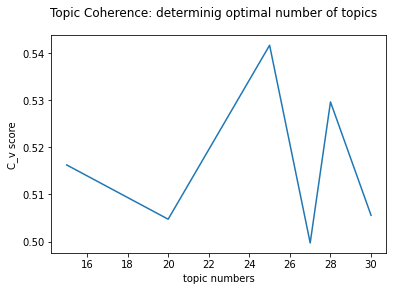

In [42]:
plt.plot([15, 20, 25, 27, 28, 30], [0.516260,0.504741,0.54167, 0.4997072, 0.5296383, 0.505570])
plt.ylabel('C_v score')
plt.xlabel('topic numbers')
plt.suptitle('Topic Coherence: determinig optimal number of topics')
plt.show()

In [43]:
#running the model with all features 
corpus_lda = lda[corpus1_bows]

In [44]:
topic_assignments= lda.get_document_topics(corpus1_bows, minimum_probability=0, minimum_phi_value=None, per_word_topics=False)
lda_matirx = [ [entry[1] for entry in doc] for doc in topic_assignments ]

In [45]:
#clustering 
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score 
import statistics 

In [46]:
km = KMeans(n_clusters = 20, init="random", n_init=20)

In [47]:
km.fit_predict(lda_matirx)

array([ 2, 14, 16, ...,  7,  7,  6])

In [48]:
print(nmi_score(labels,km.labels_))

0.33430632313244185


In [49]:
#running the model with top 2000 features 
lda2 = models.LdaModel(corpus2_bows, id2word=dict2, num_topics=25, alpha=0.01,
                                           eta=0.9);

2022-03-12 23:33:01,520 : INFO : using serial LDA version on this node
2022-03-12 23:33:01,529 : INFO : running online (single-pass) LDA training, 25 topics, 1 passes over the supplied corpus of 18846 documents, updating model once every 2000 documents, evaluating perplexity every 18846 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-12 23:33:01,530 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-12 23:33:01,531 : INFO : PROGRESS: pass 0, at document #2000/18846
2022-03-12 23:33:02,886 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:33:02,890 : INFO : topic #10 (0.010): 0.017*"people" + 0.013*"year" + 0.009*"well" + 0.009*"time" + 0.008*"think" + 0.008*"s" + 0.007*"good" + 0.007*"right" + 0.006*"say" + 0.006*"go"
2022-03-12 23:33:02,891 : INFO : topic #21 (0.010): 0.009*"use" + 0.007*"think" + 0.007*"work" + 0.006*"state" + 0.

2022-03-12 23:33:08,991 : INFO : topic diff=0.225033, rho=0.408248
2022-03-12 23:33:08,993 : INFO : PROGRESS: pass 0, at document #14000/18846
2022-03-12 23:33:10,128 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:33:10,132 : INFO : topic #24 (0.010): 0.016*"image" + 0.014*"version" + 0.013*"window" + 0.012*"water" + 0.012*"library" + 0.011*"microsoft" + 0.011*"package" + 0.011*"quality" + 0.011*"graphic" + 0.010*"product"
2022-03-12 23:33:10,133 : INFO : topic #17 (0.010): 0.017*"bike" + 0.012*"mile" + 0.010*"vote" + 0.009*"planet" + 0.009*"energy" + 0.008*"information" + 0.008*"file" + 0.007*"mass" + 0.007*"charge" + 0.006*"earth"
2022-03-12 23:33:10,134 : INFO : topic #13 (0.010): 0.016*"space" + 0.012*"use" + 0.010*"system" + 0.009*"datum" + 0.008*"part" + 0.008*"mission" + 0.007*"block" + 0.007*"technology" + 0.006*"program" + 0.006*"power"
2022-03-12 23:33:10,136 : INFO : topic #6 (0.010): 0.030*"window" + 0.019*"program" + 0.017*"file"

In [50]:
coherence_model_lda2 = CoherenceModel(model=lda2, texts=data_lemmatized, dictionary=dict2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5154448094637809


In [51]:
corpus_lda2 = lda[corpus2_bows]

In [52]:
topic_assignments= lda2.get_document_topics(corpus2_bows, minimum_probability=0, minimum_phi_value=None, per_word_topics=False)
lda2_matirx = [ [entry[1] for entry in doc] for doc in topic_assignments ]

In [53]:
#clustering 
km = KMeans(n_clusters = 20, init="random", n_init=20)
km.fit_predict(lda2_matirx)
print(nmi_score(labels,km.labels_))

0.25311377927305684


In [54]:
lda.save('lda_topic.model')
lda2.save('lda2_topic.model')

2022-03-12 23:33:27,862 : INFO : LdaState lifecycle event {'fname_or_handle': 'lda_topic.model.state', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-03-12T23:33:27.862728', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-03-12 23:33:27,865 : INFO : saved lda_topic.model.state
2022-03-12 23:33:27,879 : INFO : LdaModel lifecycle event {'fname_or_handle': 'lda_topic.model', 'separately': "['expElogbeta', 'sstats']", 'sep_limit': 10485760, 'ignore': ['state', 'id2word', 'dispatcher'], 'datetime': '2022-03-12T23:33:27.879729', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2022-03-12 23:33:27,881 : INFO : storing np array 'expElogbeta' to lda_topic.model.expElogbeta.npy
2022-03-12 23:33:27,886 : INFO : not storing attribute sta

In [59]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [60]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('lda_topic.model')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-03-12 23:36:07,684 : INFO : loading Dictionary object from dictionary.dict
2022-03-12 23:36:07,868 : INFO : Dictionary lifecycle event {'fname': 'dictionary.dict', 'datetime': '2022-03-12T23:36:07.868391', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2022-03-12 23:36:07,897 : INFO : loaded corpus index from corpus.mm.index
2022-03-12 23:36:07,897 : INFO : initializing cython corpus reader from corpus.mm
2022-03-12 23:36:08,055 : INFO : accepted corpus with 18846 documents, 10616 features, 782641 non-zero entries
202

In [62]:
data = gensimvis.prepare(lda, c, d)
data

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-03-12 23:36:45,424 : INFO : NumExpr defaulting to 8 threads.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.120334  0.135196       1        1  16.581513
23     0.157725 -0.153372       2        1  14.223019
20     0.149207  0.028971       3        1  11.673807
19     0.119369 -0.123073       4        1   6.098603
8      0.078144  0.104659       5        1   5.248375
21    -0.046440  0.133313       6        1   4.921271
15     0.020025  0.062960       7        1   4.767064
11    -0.040807 -0.036205       8        1   3.941357
6     -0.018520 -0.070273       9        1   3.581157
4      0.009401  0.116875      10        1   3.449900
12     0.024585  0.042612      11        1   3.258902
7      0.031263 -0.028395      12        1   3.092059
10     0.028784  0.051287      13        1   3.018610
9      0.013274 -0.045071      14        1   2.986847
14     0.000504  0.019319      15        1   2.953739
2     -0.070205  0.039989      16        1   2.465788
22     0.003790 -0.039996      17        1   2.171915
16    -0.009562 -0.095923      18        1   1.698302
3     -0.127060 -0.008628      19        1   0.972899
13    -0.009845 -0.040544      20        1   0.957794
24    -0.045987 -0.004435      21        1   0.742414
1     -0.058962  0.000747      22        1   0.440340
18    -0.136771 -0.042918      23        1   0.439313
17    -0.090507 -0.014069      24        1   0.218773
5     -0.101736 -0.033026      25        1   0.096240, topic_info=          Term         Freq        Total Category  logprob  loglift
637       game  2210.000000  2210.000000  Default  30.0000  30.0000
176       file  3556.000000  3556.000000  Default  29.0000  29.0000
1090     drive  1615.000000  1615.000000  Default  28.0000  28.0000
2735  armenian  1431.000000  1431.000000  Default  27.0000  27.0000
360     system  3342.000000  3342.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1210      tape     0.887492   381.007964  Topic25  -7.1427   0.8839
1         good     1.170503  4242.832249  Topic25  -6.8659  -1.2495
2815    manual     0.892941   539.300976  Topic25  -7.1365   0.5426
8        think     1.035865  5748.393227  Topic25  -6.9881  -1.6754
2255      disk     0.786280   891.493682  Topic25  -7.2637  -0.0873

[1490 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4452      1  0.068907  academic
4452      2  0.041344  academic
4452      3  0.027563  academic
4452      4  0.055126  academic
4452      5  0.027563  academic
...     ...       ...       ...
1430     16  0.017908      zoom
1430     17  0.017908      zoom
1430     18  0.017908      zoom
1430     19  0.017908      zoom
1430     20  0.196986      zoom

[24058 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 24, 21, 20, 9, 22, 16, 12, 7, 5, 13, 8, 11, 10, 15, 3, 23, 17, 4, 14, 25, 2, 19, 18, 6])

In [63]:
pyLDAvis.save_html(data,'lda_vis_25.html')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
d = gensim.corpora.Dictionary.load('dict2.dict')
c = gensim.corpora.MmCorpus('corpus2.mm')
lda = gensim.models.LdaModel.load('lda2_topic.model')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-03-12 23:37:44,136 : INFO : loading Dictionary object from dict2.dict
2022-03-12 23:37:44,242 : INFO : Dictionary lifecycle event {'fname': 'dict2.dict', 'datetime': '2022-03-12T23:37:44.242112', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2022-03-12 23:37:44,273 : INFO : loaded corpus index from corpus2.mm.index
2022-03-12 23:37:44,273 : INFO : initializing cython corpus reader from corpus2.mm
2022-03-12 23:37:44,316 : INFO : accepted corpus with 18846 documents, 2000 features, 586996 non-zero entries
2022-03-12 2

In [66]:
data = gensimvis.prepare(lda, c, d)
data

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.058287  0.114162       1        1  7.767715
6     -0.150882 -0.043144       2        1  7.079469
10     0.146951  0.014110       3        1  6.343588
9      0.119711 -0.051763       4        1  6.284770
16     0.103247 -0.022245       5        1  6.047231
5     -0.228206 -0.017133       6        1  5.740636
23    -0.009297 -0.107783       7        1  5.208219
18     0.138060 -0.117566       8        1  5.169951
2      0.100591  0.150098       9        1  4.845864
1      0.126239 -0.025641      10        1  4.729317
11    -0.178637 -0.042277      11        1  4.422319
21    -0.082747  0.086845      12        1  3.875466
13    -0.068700 -0.027322      13        1  3.754200
3      0.024502 -0.108470      14        1  3.571093
0      0.075361 -0.089655      15        1  3.566540
12    -0.033882  0.043121      16        1  3.172599
8     -0.058618  0.052854      17        1  3.084082
20     0.012500  0.062126      18        1  2.987318
22     0.071027  0.025120      19        1  2.332997
4     -0.027450 -0.033749      20        1  2.306182
15    -0.044451  0.089898      21        1  2.176745
17    -0.016053  0.010833      22        1  1.655854
7      0.025473  0.093257      23        1  1.512003
24    -0.095181 -0.026500      24        1  1.254730
19    -0.007846 -0.029177      25        1  1.111113, topic_info=        Term         Freq        Total Category  logprob  loglift
116     file  3901.000000  3901.000000  Default  30.0000  30.0000
435     game  2497.000000  2497.000000  Default  29.0000  29.0000
1139   image  2590.000000  2590.000000  Default  28.0000  28.0000
353   window  2609.000000  2609.000000  Default  27.0000  27.0000
6       year  3636.000000  3636.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
648     show    71.024663  1882.344179  Topic25  -4.9330   1.2226
163   number    72.022659  2305.995522  Topic25  -4.9191   1.0335
445     team    55.062786  1300.817656  Topic25  -5.1876   1.3375
171     post    60.569548  2383.648370  Topic25  -5.0923   0.8272
227    study    49.228917   860.372843  Topic25  -5.2996   1.6389

[1308 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1569      1  0.010004  absolute
1569      2  0.035014  absolute
1569      3  0.010004  absolute
1569      4  0.020008  absolute
1569      5  0.065026  absolute
...     ...       ...       ...
251      21  0.007138      york
251      22  0.047588      york
251      23  0.014276      york
251      24  0.009518      york
251      25  0.016656      york

[23125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 7, 11, 10, 17, 6, 24, 19, 3, 2, 12, 22, 14, 4, 1, 13, 9, 21, 23, 5, 16, 18, 8, 25, 20])

In [67]:
pyLDAvis.save_html(data,'lda2_vis_25.html')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


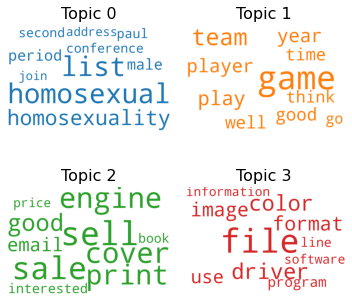

<Figure size 432x288 with 0 Axes>

In [68]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=1500,
                  height=1000,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(5,5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig('lda_wordcloud.png')

In [71]:
plt.savefig('Distribution of Document Word Counts.png')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 432x288 with 0 Axes>

In [72]:
#using dict1 which had only gone through document frequency preprocesssing and not term frequency 
lda3 = models.LdaModel(corpus_bows_df, id2word=dict1, num_topics=20,alpha=0.01,
                                           eta=0.9);
#Compute Model Perplexity and Coherence Score
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda3, texts=data_lemmatized, dictionary=dict1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#running the model with all features 
corpus_lda = lda[corpus_bows_df]
lda3.save('lda3_topic.model')

d = gensim.corpora.Dictionary.load('dict1.dict')
c = gensim.corpora.MmCorpus('corpus_df.mm')
lda = gensim.models.LdaModel.load('lda3_topic.model')

data = pyLDAvis.gensim.prepare(lda, c, d)
data

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-03-12 23:52:00,642 : INFO : using serial LDA version on this node
2022-03-12 23:52:00,664 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 18846 documents, updating model once every 2000 documents, evaluating perplexity every 18846 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-12 23:52:00,665 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-12 23:52:00,667 : INFO : PROGRESS: pass 0, at document #2000/18846
2022-03-12 23:52:02,067 : INFO : merging changes from 

2022-03-12 23:52:08,504 : INFO : topic #7 (0.010): 0.017*"people" + 0.016*"think" + 0.011*"say" + 0.011*"go" + 0.010*"believe" + 0.009*"s" + 0.008*"time" + 0.008*"well" + 0.007*"make" + 0.006*"tell"
2022-03-12 23:52:08,506 : INFO : topic diff=0.241328, rho=0.408248
2022-03-12 23:52:08,508 : INFO : PROGRESS: pass 0, at document #14000/18846
2022-03-12 23:52:09,637 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:52:09,646 : INFO : topic #14 (0.010): 0.012*"space" + 0.007*"probe" + 0.007*"service" + 0.006*"mission" + 0.006*"information" + 0.005*"program" + 0.005*"launch" + 0.005*"university" + 0.005*"cover" + 0.004*"research"
2022-03-12 23:52:09,648 : INFO : topic #12 (0.010): 0.012*"thank" + 0.011*"price" + 0.010*"sell" + 0.010*"email" + 0.008*"good" + 0.008*"post" + 0.008*"well" + 0.007*"send" + 0.006*"look" + 0.006*"sale"
2022-03-12 23:52:09,649 : INFO : topic #13 (0.010): 0.008*"question" + 0.005*"good" + 0.005*"ride" + 0.005*"pope" + 0.005*"

2022-03-12 23:52:26,642 : INFO : 147 batches submitted to accumulate stats from 9408 documents (-287712 virtual)
2022-03-12 23:52:26,825 : INFO : 155 batches submitted to accumulate stats from 9920 documents (-301004 virtual)
2022-03-12 23:52:27,145 : INFO : 165 batches submitted to accumulate stats from 10560 documents (-324063 virtual)
2022-03-12 23:52:27,261 : INFO : 169 batches submitted to accumulate stats from 10816 documents (-333117 virtual)
2022-03-12 23:52:27,704 : INFO : 187 batches submitted to accumulate stats from 11968 documents (-381811 virtual)
2022-03-12 23:52:27,843 : INFO : 191 batches submitted to accumulate stats from 12224 documents (-386668 virtual)
2022-03-12 23:52:28,157 : INFO : 202 batches submitted to accumulate stats from 12928 documents (-416084 virtual)
2022-03-12 23:52:28,442 : INFO : 211 batches submitted to accumulate stats from 13504 documents (-434636 virtual)
2022-03-12 23:52:29,209 : INFO : 233 batches submitted to accumulate stats from 14912 docu


Coherence Score:  0.528347229136913


2022-03-12 23:52:32,321 : INFO : loading expElogbeta from lda3_topic.model.expElogbeta.npy with mmap=None
2022-03-12 23:52:32,329 : INFO : setting ignored attribute state to None
2022-03-12 23:52:32,330 : INFO : setting ignored attribute id2word to None
2022-03-12 23:52:32,331 : INFO : setting ignored attribute dispatcher to None
2022-03-12 23:52:32,332 : INFO : LdaModel lifecycle event {'fname': 'lda3_topic.model', 'datetime': '2022-03-12T23:52:32.331051', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2022-03-12 23:52:32,332 : INFO : loading LdaState object from lda3_topic.model.state
2022-03-12 23:52:32,353 : INFO : LdaState lifecycle event {'fname': 'lda3_topic.model.state', 'datetime': '2022-03-12T23:52:32.353050', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [73]:
lda4 = models.LdaModel(corpus_bows_trigram, id2word=dictionary_alt, num_topics=25,alpha=0.01,
                                           eta=0.9);
#Compute Model Perplexity and Coherence Score
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda4, texts=data_lemmatized, dictionary=dictionary_alt, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
#running the model with all features 
corpus_lda = lda[corpus_bows_trigram]
lda4.save('lda4_topic.model')

d = gensim.corpora.Dictionary.load('dictionary_alt.dict')
c = gensim.corpora.MmCorpus('corpus_trigram.mm')
lda = gensim.models.LdaModel.load('lda4_topic.model')

data = pyLDAvis.gensim.prepare(lda, c, d)
data

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2022-03-12 23:53:03,694 : INFO : using serial LDA version on this node
2022-03-12 23:53:03,735 : INFO : running online (single-pass) LDA training, 25 topics, 1 passes over the supplied corpus of 18846 documents, updating model once every 2000 documents, evaluating perplexity every 18846 documents, iterating 50x with a convergence threshold of 0.001000
2022-03-12 23:53:03,736 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-03-12 23:53:03,737 : INFO : PROGRESS: pass 0, at document #2000/18846
2022-03-12 23:53:05,297 : INFO : merging changes from 

2022-03-12 23:53:12,662 : INFO : topic #6 (0.010): 0.013*"card" + 0.009*"support" + 0.009*"use" + 0.009*"system" + 0.008*"software" + 0.006*"thank" + 0.005*"monitor" + 0.005*"video" + 0.005*"good" + 0.005*"memory"
2022-03-12 23:53:12,664 : INFO : topic #11 (0.010): 0.005*"university" + 0.004*"right" + 0.003*"greek" + 0.003*"galaxy" + 0.003*"cover" + 0.002*"weaver" + 0.002*"greece" + 0.002*"rider" + 0.002*"include" + 0.002*"grb"
2022-03-12 23:53:12,666 : INFO : topic diff=0.212288, rho=0.408248
2022-03-12 23:53:12,668 : INFO : PROGRESS: pass 0, at document #14000/18846
2022-03-12 23:53:14,000 : INFO : merging changes from 2000 documents into a model of 18846 documents
2022-03-12 23:53:14,018 : INFO : topic #19 (0.010): 0.017*"right" + 0.012*"state" + 0.011*"government" + 0.010*"people" + 0.008*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.005*"constitution" + 0.005*"arm" + 0.004*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.004*"mean" + 0.004*"country"
2022-03-12 23:53:1

2022-03-12 23:53:29,607 : INFO : 147 batches submitted to accumulate stats from 9408 documents (-298557 virtual)
2022-03-12 23:53:29,815 : INFO : 155 batches submitted to accumulate stats from 9920 documents (-311021 virtual)
2022-03-12 23:53:30,276 : INFO : 169 batches submitted to accumulate stats from 10816 documents (-346549 virtual)
2022-03-12 23:53:31,326 : INFO : 202 batches submitted to accumulate stats from 12928 documents (-427000 virtual)
2022-03-12 23:53:31,575 : INFO : 211 batches submitted to accumulate stats from 13504 documents (-448090 virtual)
2022-03-12 23:53:32,268 : INFO : 233 batches submitted to accumulate stats from 14912 documents (-508028 virtual)
2022-03-12 23:53:32,480 : INFO : 243 batches submitted to accumulate stats from 15552 documents (-533976 virtual)
2022-03-12 23:53:32,563 : INFO : 246 batches submitted to accumulate stats from 15744 documents (-536119 virtual)
2022-03-12 23:53:32,898 : INFO : 257 batches submitted to accumulate stats from 16448 docu


Coherence Score:  0.5179669811442801


2022-03-12 23:53:35,714 : INFO : setting ignored attribute state to None
2022-03-12 23:53:35,714 : INFO : setting ignored attribute id2word to None
2022-03-12 23:53:35,715 : INFO : setting ignored attribute dispatcher to None
2022-03-12 23:53:35,716 : INFO : LdaModel lifecycle event {'fname': 'lda4_topic.model', 'datetime': '2022-03-12T23:53:35.716596', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2022-03-12 23:53:35,716 : INFO : loading LdaState object from lda4_topic.model.state
2022-03-12 23:53:35,725 : INFO : LdaState lifecycle event {'fname': 'lda4_topic.model.state', 'datetime': '2022-03-12T23:53:35.725564', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [74]:
pyLDAvis.save_html(data,'lda4_vis_25.html')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
